In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Salary_dataset.csv")

In [3]:
df.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


Text(0.5, 1.0, 'Experience vs Salary')

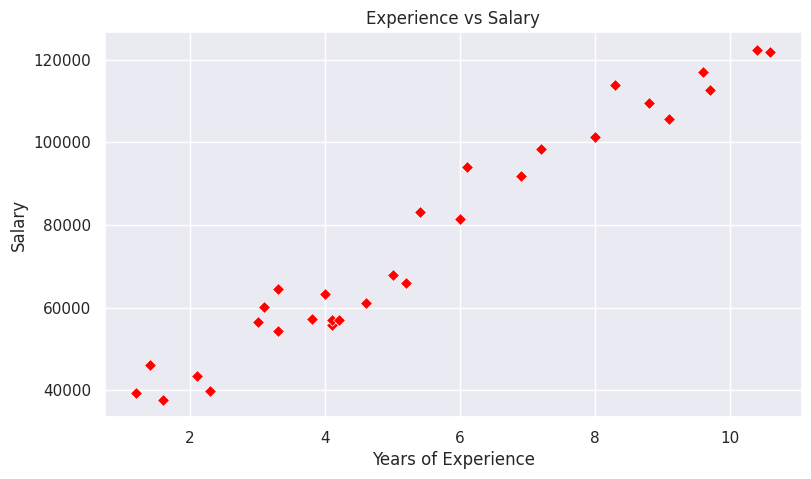

In [6]:
sns.set_theme()
plt.figure(figsize = (9,5))
sns.scatterplot(x = "YearsExperience", y ="Salary", data = df, marker = "D", color = "red")


plt.xlabel("Years of Experience")
plt.title("Experience vs Salary")


### **Data Preprocessing**

---



In [7]:
df = df.drop("Unnamed: 0", axis = 1)

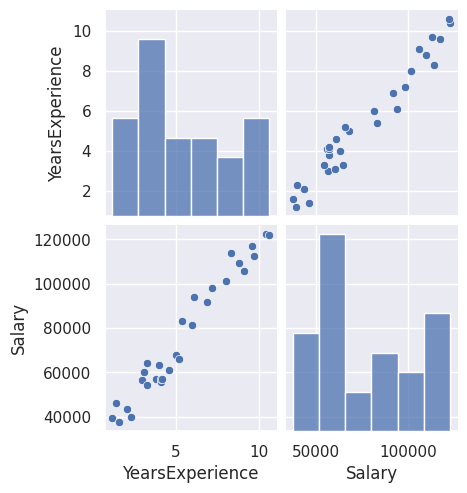

In [8]:
sns.pairplot(data = df)

In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
### Correlation
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [11]:
### Independent Feature should be a data Frame or 2D Array

X = df[["YearsExperience"]]
X.shape


(30, 1)

In [12]:
### Dependent Feature can be in 1D form
y =df.Salary
y.head(5)

0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64

In [17]:
### Standardization aims to bring all features in your dataset to a common scale.
### This is achieved by transforming the features to have a mean of 0 and a standard deviation of 1 using z score formula

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)


In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [19]:
reg.coef_

array([25511.6333602])

In [20]:
reg.intercept_

71058.33333333333

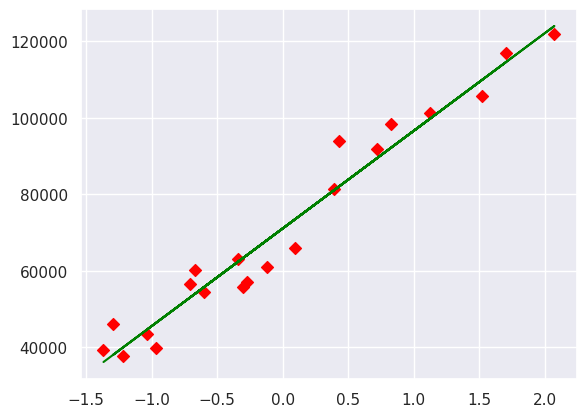

In [25]:
### Plotting the best fit line

plt.scatter(X_train, y_train, marker="D", color = "red")
plt.plot(X_train, reg.predict(X_train), color = "green")


In [28]:
y_pred = reg.predict(X_test)


### **Performance Metrics**

---



In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE : ", mse)
print("MAE : ", mae)
print("RMSE : ", rmse)

MSE :  37784662.46621308
MAE :  5161.328710400179
RMSE :  6146.9230079945755


In [47]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)


0.9414466227178215
